> 시계열 분석을 정리하고자 한다. 시계열의 상태공간 모델링에 대해 알아보자.

상태 공간 모델(State Space Model)은 시계열 데이터의 복잡한 동적 구조를 설명하기 위해 설계되었으며, 관측되지 않는 상태 변수를 사용하여 시계열 데이터의 변화를 설명한다.

**상태 방정식(State Equation)**

상태 방정식은 시간에 따라 변화하는 내재적 상태 변수의 진화를 설명한다. 이 방정식은 일반적으로 자기회귀 프로세스로 모델링된다.

$$\mathbf{x}_t = \mathbf{F}_t\mathbf{x}_{t-1} + \mathbf{G}_t \mathbf{w}_t$$

여기서,

- $\mathbf{x}_t$는 시간 $t$에서의 상태 벡터이다.
- $\mathbf{F}_t$는 상태 전이 행렬로, 이전 상태에서 현재 상태로의 전이를 설명한다.
- $\mathbf{G}_t$는 입력 행렬로, 외부 입력이 상태 변화에 미치는 영향을 나타낸다.
- $\mathbf{w}_t$는 프로세스 노이즈로, 모델에 불확실성을 추가한다.

**관측 방정식 (Observation Equation)**

관측 방정식은 내재적 상태 변수와 실제 관측된 데이터 간의 관계를 설명한다.

$$\mathbf{y}_t = \mathbf{H}_t\mathbf{x}_{t} + \mathbf{v}_t$$

여기서,

- $\mathbf{y}_t$는 시간 $t$에서 관측된 데이터 벡터이다.
- $\mathbf{H}_t$는 관측 행렬로, 상태 변수가 관측 데이터에 어떻게 영향을 미치는지 설명한다.
- $\mathbf{v}_t$는 관측 노이즈로, 관측 과정에서 발생하는 오차를 나타낸다.

# Kalman Filter

칼만 필터(Kalman filter)는 선형 동적 시스템에서 시간에 따라 변하는 신호를 최적으로 추정하기 위해 사용되는 재귀적 알고리즘이다. 특히 잡음이 있는 데이터를 처리할 때 유용하다. 칼만 필터는 과거에 수행한 측정값을 바탕으로 현재의 상태 변수의 결합분포를 추정한다. 알고리즘은 예측과 업데이트의 두 단계로 이루어진다.

### <예측 단계> 

현재의 상태 추정치와 공분산을 기반으로 다음 시간 단계의 상태 추정치와 공분산을 예측한다.

**상태예측:**
- $\hat{x}_{k|k-1} = F_k \hat{x}_{k-1|k-1} + B_k u_k$
  - $\hat{x}_{k|k-1}$는 시간 $k$에서의 상태 예측값, $F_k$는 상태 전이 행렬, $\hat{x}_{k-1|k-1}$는 이전 시간 $k-1$에서의 상태 추정치, $B_k$는 제어 입력 행렬, $u_k$는 제어 입력

**공분산예측:**
- $P_{k|k-1} = F_k P_{k-1|k-1} F_k^T + Q_k$
  - $P_{k|k-1}$는 예측 공분산, $P_{k-1|k-1}$는 이전 추정 공분산, $Q_k$는 프로세스 잡음의 공분산 행렬

### <업데이트 단계> 

새로운 측정 데이터를 사용하여 예측된 상태 추정치를 업데이트한다.

**칼만 이득 계산:**
- $K_k = P_{k|k-1} H_k^T (H_k P_{k|k-1} H_k^T + R_k)^{-1}$
  - $K_k$는 칼만 이득, $H_k$는 측정 행렬, $R_k$는 측정 잡음의 공분산 행렬

**상태 업데이트:**
- $\hat{x}_{k|k} = \hat{x}_{k|k-1} + K_k (z_k - H_k \hat{x}_{k|k-1})$
  - $z_k$는 시간 $k$에서의 실제 측정값

**공분산 업데이트:**
- $P_{k|k} = (I - K_k H_k) P_{k|k-1}$

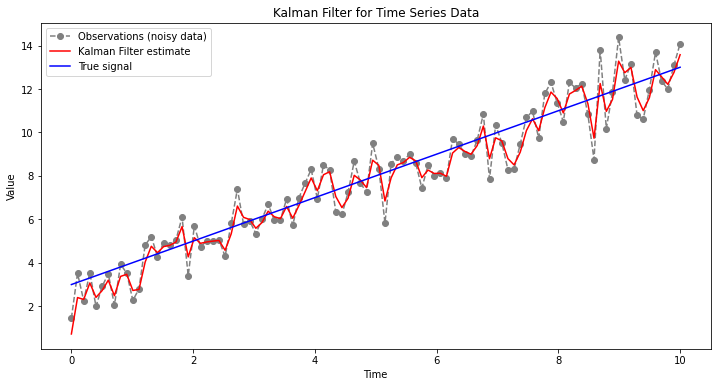

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

# 인위적 데이터 생성: 선형 추세 + 잡음
n_timesteps = 100
x = np.linspace(0, 10, n_timesteps)
true_signal = x + 3
observations = true_signal + np.random.normal(0, 1, n_timesteps)

# 칼만 필터 설정
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)

# 칼만 필터로 신호 추정
state_means, state_covariances = kf.filter(observations)

# 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(x, observations, label='Observations (noisy data)', linestyle='dashed', marker='o', color='gray')
plt.plot(x, state_means, label='Kalman Filter estimate', color='red')
plt.plot(x, true_signal, label='True signal', color='blue')
plt.legend()
plt.title('Kalman Filter for Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

칼만 필터의 단점

- 칼만 필터는 기본적으로 시스템이 선형이고, 잡음이 정규 분포를 따른다고 가정: 아닌 경우 Extended Kalman Filter나 Unscented Kalman Filter와 같은 변형이 필요

- 초기 상태 추정치나 모델 파라미터(예: 전이 행렬)의 정확도가 부족하면 추정의 정확성이 저하

- (계산 복잡성) 칼만 필터는 매 시간 단계마다 행렬 연산을 수행해야 하므로, 행렬의 크기가 크거나 시스템이 복잡해질 경우 계산 비용이 증가할 수 있습니다.

- 칼만 필터를 적용하기 위해서는 시스템의 동적 모델을 알아야 함

# Unscented Kalman Filter

무향 칼만 필터(UKF)는 칼만 필터의 비선형 확장이다.

시스템의 비선형성을 처리하기 위해 '시그마 포인트'라는 개념을 도입한다. 이는 상태 추정치의 평균과 공분산을 기반으로 선택된 몇 개의 표본 점을 사용하여, 비선형 변환을 통해 이 포인트들을 전파시키는 방식으로 작동한다. 이렇게 전파된 포인트들을 사용하여 업데이트된 평균과 공분산을 계산함으로써 비선형 시스템의 상태를 추정한다.

- 시그마 포인트 생성: 상태 추정치의 평균과 공분산으로부터 시그마 포인트를 계산
- 시그마 포인트의 전파: 각 시그마 포인트를 시스템의 비선형 모델을 통해 전파
- 평균과 공분산 업데이트: 전파된 시그마 포인트들로부터 새로운 평균과 공분산을 계산
- 측정 업데이트: 새로운 측정값을 사용하여 상태 추정치와 공분산을 업데이트

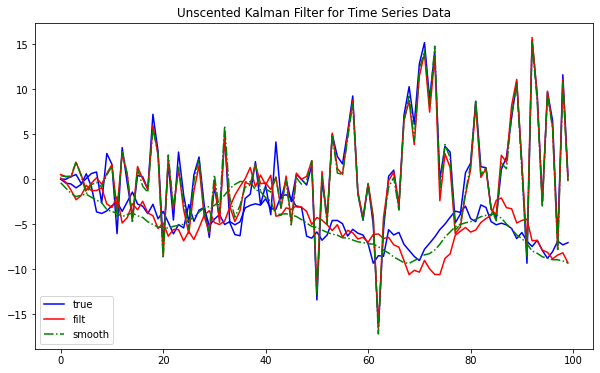

In [48]:
from pykalman import UnscentedKalmanFilter

# initialize parameters
def transition_function(state, noise):
    a = np.sin(state[0]) + state[1] * noise[0]
    b = state[1] + noise[1]
    return np.array([a, b])

def observation_function(state, noise):
    C = np.array([[-1, 0.5], [0.2, 0.1]])
    return np.dot(C, state) + noise

transition_covariance = np.eye(2)
random_state = np.random.RandomState(123)
observation_covariance = np.eye(2) + random_state.randn(2, 2) * 0.1
initial_state_mean = [0, 0]
initial_state_covariance = [[1, 0.1], [-0.1, 1]]

# sample from model
kf = UnscentedKalmanFilter(
    transition_function, observation_function,
    transition_covariance, observation_covariance,
    initial_state_mean, initial_state_covariance,
    random_state=random_state
)
states, observations = kf.sample(100, initial_state_mean)

# estimate state with filtering and smoothing
filtered_state_estimates = kf.filter(observations)[0]
smoothed_state_estimates = kf.smooth(observations)[0]

# draw estimates
plt.figure(figsize=(10,6))
plt.title('Unscented Kalman Filter for Time Series Data')
lines_true = plt.plot(states, color='b')
lines_filt = plt.plot(filtered_state_estimates, color='r', ls='-')
lines_smooth = plt.plot(smoothed_state_estimates, color='g', ls='-.')
plt.legend((lines_true[0], lines_filt[0], lines_smooth[0]),
          ('true', 'filt', 'smooth'),
          loc='lower left'
)
plt.show()

- AR (AutoRegressive) 부분: 과거의 종속 변수 값(지연 값)이 미래 값에 영향을 미친다고 가정 

- MA (Moving Average) 부분: 과거의 예측 오차가 미래 예측에 영향을 미친다고 가정

- Integration (차분) 부분: 비정상성(Non-stationarity) 데이터를 정상성(Stationarity) 데이터로 변환하기 위해 사용

- Seasonal 요소: 계절성 패턴을 모델링. 계절성 AR 및 MA 구성 요소와 계절성 차분 차수를 포함할 수 있으며, 이들은 각각 $P, D, Q$ 및 계절 주기 $s$에 의해 정의됨

- Exogenous 변수 ($\mathbf{X}$): 모델에 외부에서 영향을 미치는 변수(예: 경제 지표, 마케팅 캠페인, 기상 조건 등)를 포함. 이 변수들은 종속 변수에 직접적인 영향을 미칠 수 있으며, 모델의 설명력과 예측력을 향상시킴.

$$(1 - \sum_{i=1}^{p}{\phi_i L^i})(1 - L^d)(1 - \sum_{i=1}^{P}{\Phi_i L^{i \cdot s}})^D Y_t = (1 + \sum_{j=1}^{q}{\theta_j L^j})(1 + \sum_{j=1}^{Q}{\Theta_j L^{j \cdot s}}) \epsilon_t + \mathbf{X}_t \beta$$


여기서,

- $L$은 lag operator
- $\phi_i$, $\Phi_i$는 비계절 및 계절 AR 파라미터
- $\theta_j$, $\Theta_j$는 비계절 및 계절 MA 파라미터
- $\mathbf{X}_t$는 시점 $t$에서 외생 변수
- $\beta$는 외생 변수의 계수

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime

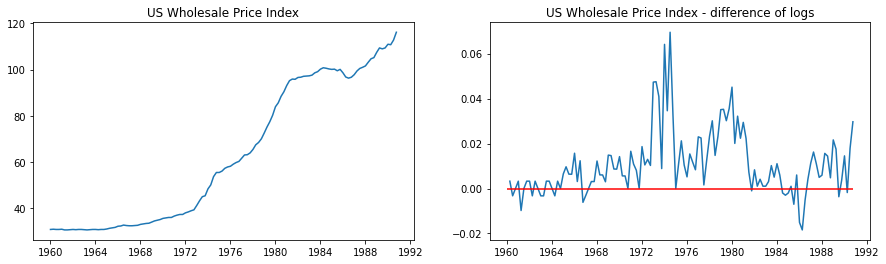

In [5]:
data = pd.read_stata('data/wpi1.dta')
data.index = data.t
# Set the frequency
data.index.freq="QS-OCT"

data['ln_wpi'] = np.log(data['wpi'])
data['D.ln_wpi'] = data['ln_wpi'].diff()

# Graph data
fig, axes = plt.subplots(1, 2, figsize=(15,4))

# Levels
axes[0].plot(data.index._mpl_repr(), data['wpi'], '-')
axes[0].set(title='US Wholesale Price Index')

# Log difference
axes[1].plot(data.index._mpl_repr(), data['D.ln_wpi'], '-')
axes[1].hlines(0, data.index[0], data.index[-1], 'r')
axes[1].set(title='US Wholesale Price Index - difference of logs');

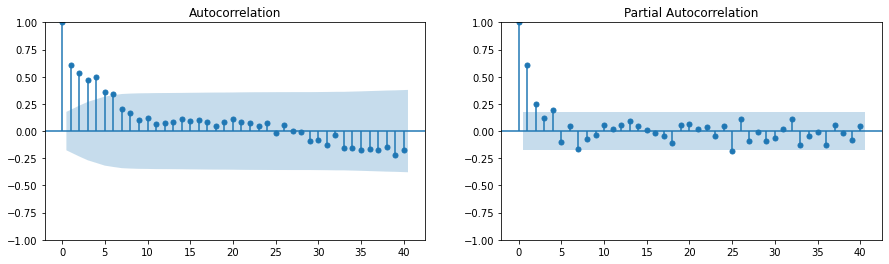

In [7]:
# Graph data
fig, axes = plt.subplots(1, 2, figsize=(15,4))

fig = sm.graphics.tsa.plot_acf(data.iloc[1:]['D.ln_wpi'], lags=40, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(data.iloc[1:]['D.ln_wpi'], lags=40, ax=axes[1])

In [8]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(data['ln_wpi'], trend='c', order=(1,1,(1,0,0,1)))
res = mod.fit(disp=False)
print(res.summary())

                                 SARIMAX Results                                 
Dep. Variable:                    ln_wpi   No. Observations:                  124
Model:             SARIMAX(1, 1, [1, 4])   Log Likelihood                 386.033
Date:                   Fri, 12 Apr 2024   AIC                           -762.067
Time:                           15:02:29   BIC                           -748.006
Sample:                       01-01-1960   HQIC                          -756.355
                            - 10-01-1990                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0024      0.002      1.487      0.137      -0.001       0.006
ar.L1          0.7800      0.094      8.263      0.000       0.595       0.965
ma.L1         -0.3983      0

**ARIMA Postestimation: Example - Dynamic Forecasting**

In [11]:
raw = pd.read_stata('data/friedman2.dta')
raw.index = raw.time
raw.index.freq = "QS-OCT"
data = raw.loc[:'1981']

# Variables
endog = data.loc['1959':, 'consump']
exog = sm.add_constant(data.loc['1959':, 'm2'])
nobs = endog.shape[0]

# Fit the model
mod = sm.tsa.statespace.SARIMAX(endog.loc[:'1978-01-01'], exog=exog.loc[:'1978-01-01'], order=(1,0,1))
fit_res = mod.fit(disp=False, maxiter=250)
print(fit_res.summary())

                               SARIMAX Results                                
Dep. Variable:                consump   No. Observations:                   77
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -243.316
Date:                Fri, 12 Apr 2024   AIC                            496.633
Time:                        15:06:01   BIC                            508.352
Sample:                    01-01-1959   HQIC                           501.320
                         - 01-01-1978                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6779     18.492      0.037      0.971     -35.565      36.921
m2             1.0379      0.021     50.329      0.000       0.997       1.078
ar.L1          0.8775      0.059     14.859      0.0

In [12]:
# get results for the full dataset but using the estimated parameters (on a subset of the data)

mod = sm.tsa.statespace.SARIMAX(endog, exog=exog, order=(1,0,1))
res = mod.filter(fit_res.params)

In [13]:
# In-sample one-step-ahead predictions
predict = res.get_prediction()
predict_ci = predict.conf_int()

In [14]:
# Dynamic predictions
predict_dy = res.get_prediction(dynamic='1978-01-01')
predict_dy_ci = predict_dy.conf_int()

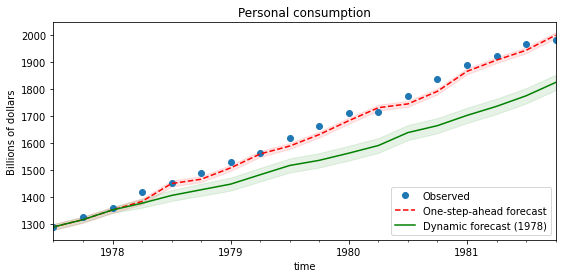

In [15]:
# Graph
fig, ax = plt.subplots(figsize=(9,4))
npre = 4
ax.set(title='Personal consumption', xlabel='Date', ylabel='Billions of dollars')

# Plot data points
data.loc['1977-07-01':, 'consump'].plot(ax=ax, style='o', label='Observed')

# Plot predictions
predict.predicted_mean.loc['1977-07-01':].plot(ax=ax, style='r--', label='One-step-ahead forecast')
ci = predict_ci.loc['1977-07-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)
predict_dy.predicted_mean.loc['1977-07-01':].plot(ax=ax, style='g', label='Dynamic forecast (1978)')
ci = predict_dy_ci.loc['1977-07-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='g', alpha=0.1)

legend = ax.legend(loc='lower right')

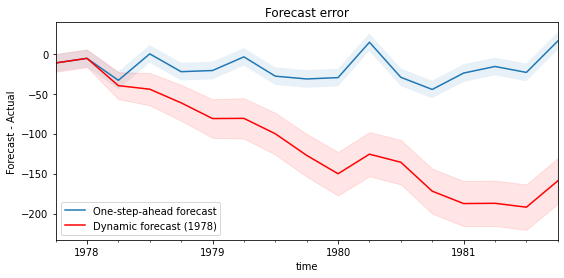

In [16]:
# Prediction error

# Graph
fig, ax = plt.subplots(figsize=(9,4))
npre = 4
ax.set(title='Forecast error', xlabel='Date', ylabel='Forecast - Actual')

# In-sample one-step-ahead predictions and 95% confidence intervals
predict_error = predict.predicted_mean - endog
predict_error.loc['1977-10-01':].plot(ax=ax, label='One-step-ahead forecast')
ci = predict_ci.loc['1977-10-01':].copy()
ci.iloc[:,0] -= endog.loc['1977-10-01':]
ci.iloc[:,1] -= endog.loc['1977-10-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], alpha=0.1)

# Dynamic predictions and 95% confidence intervals
predict_dy_error = predict_dy.predicted_mean - endog
predict_dy_error.loc['1977-10-01':].plot(ax=ax, style='r', label='Dynamic forecast (1978)')
ci = predict_dy_ci.loc['1977-10-01':].copy()
ci.iloc[:,0] -= endog.loc['1977-10-01':]
ci.iloc[:,1] -= endog.loc['1977-10-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)

legend = ax.legend(loc='lower left');
legend.get_frame().set_facecolor('w')

# HMM(Hidden Markov Model)

은닉 마르코프 모델(Hidden Markov Model, HMM)은 시간에 따라 변하는 시스템의 상태를 모델링하기 위한 통계적 모델이다. 이 모델은 관측할 수 없는(은닉된) 상태가 시간에 따라 마르코프 과정(Markov process)에 따라 변화하며, 각 상태는 특정 확률 분포를 가지고 관측 가능한 결과를 생성한다고 가정한다. HMM은 이러한 은닉 상태와 관측된 데이터 사이의 관계를 모델링하는 데 사용된다.

# 참고자료

- Statsmodels (https://www.statsmodels.org/stable/examples/index.html#state-space-models)
- https://github.com/pykalman/pykalman